In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. bolzano'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,21,P.A. Bolzano,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,14.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,21,P.A. Bolzano,60,9,69,603,672,59,65,...,0.0,9222.0,1098.0,62.0,13.04,10.27,0.70,5.92,-18.18,9.62
424,2021-04-24T17:00:00,21,P.A. Bolzano,60,7,67,672,739,67,76,...,1.0,9681.0,1149.0,69.0,10.45,9.07,0.79,6.61,-22.22,9.97
425,2021-04-25T17:00:00,21,P.A. Bolzano,58,7,65,734,799,60,67,...,0.0,4287.0,752.0,62.0,10.77,8.14,1.56,8.91,0.00,8.12
426,2021-04-26T17:00:00,21,P.A. Bolzano,65,6,71,731,802,3,4,...,0.0,1180.0,246.0,-3.0,8.45,8.85,0.34,1.63,-14.29,0.38


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 48
Nuovi tamponi: 12494.0
Percentuale nuovi positivi/nuovi tamponi: 0.4 %
Nuovi guariti: 4.0
Nuovi deceduti: 0.0
Variazione positivi ricoverati con sintomi: 0.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 44.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,21,P.A. Bolzano,223,34,257,6518,6775,-154,350,...,7.0,12745.0,502.0,-152.0,13.23,3.79,2.75,69.72,0.00,-2.22
1,2021-02-27T17:00:00,21,P.A. Bolzano,213,32,245,6539,6784,9,371,...,4.0,14425.0,490.0,21.0,13.06,3.61,2.57,75.71,-5.88,0.13
2,2021-02-28T17:00:00,21,P.A. Bolzano,218,33,251,6451,6702,-82,226,...,5.0,7151.0,432.0,-88.0,13.15,3.75,3.16,52.31,3.12,-1.21
3,2021-03-01T17:00:00,21,P.A. Bolzano,218,31,249,6477,6726,24,121,...,8.0,13192.0,191.0,26.0,12.45,3.70,0.92,63.35,-6.06,0.36
4,2021-03-02T17:00:00,21,P.A. Bolzano,208,31,239,6653,6892,166,236,...,4.0,21258.0,235.0,176.0,12.97,3.47,1.11,100.43,0.00,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,21,P.A. Bolzano,60,9,69,603,672,59,65,...,0.0,9222.0,1098.0,62.0,13.04,10.27,0.70,5.92,-18.18,9.62
57,2021-04-24T17:00:00,21,P.A. Bolzano,60,7,67,672,739,67,76,...,1.0,9681.0,1149.0,69.0,10.45,9.07,0.79,6.61,-22.22,9.97
58,2021-04-25T17:00:00,21,P.A. Bolzano,58,7,65,734,799,60,67,...,0.0,4287.0,752.0,62.0,10.77,8.14,1.56,8.91,0.00,8.12
59,2021-04-26T17:00:00,21,P.A. Bolzano,65,6,71,731,802,3,4,...,0.0,1180.0,246.0,-3.0,8.45,8.85,0.34,1.63,-14.29,0.38


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

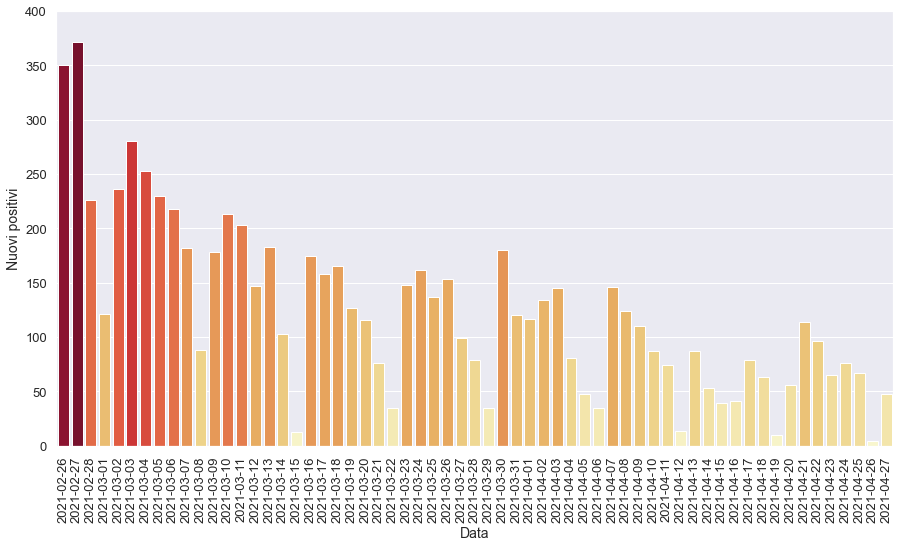

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

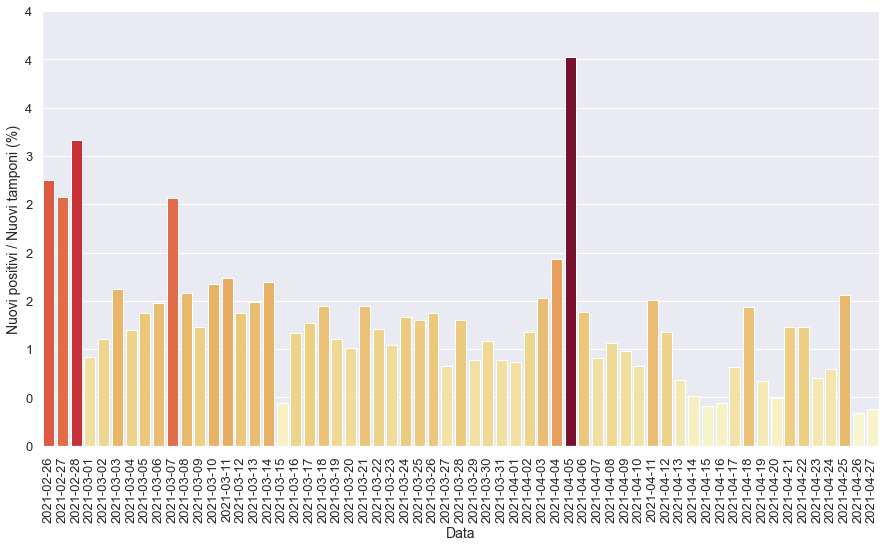

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

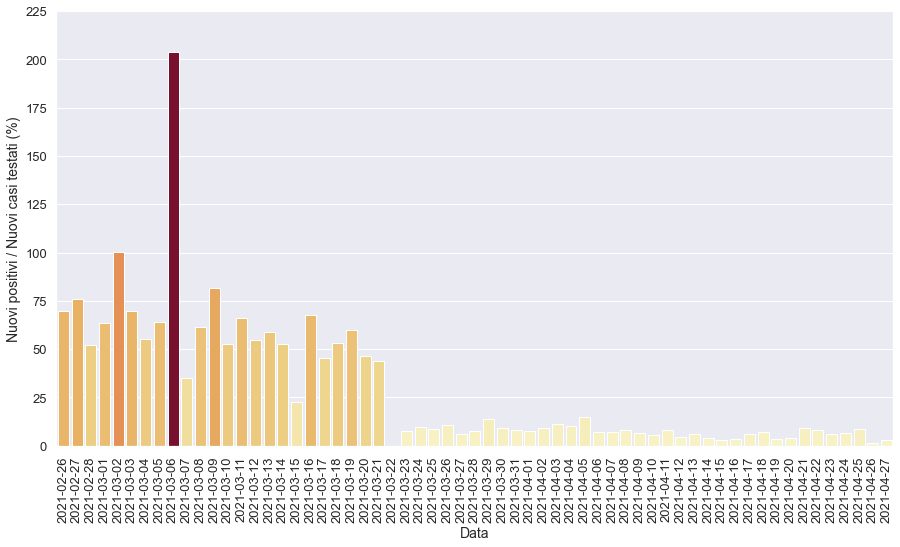

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

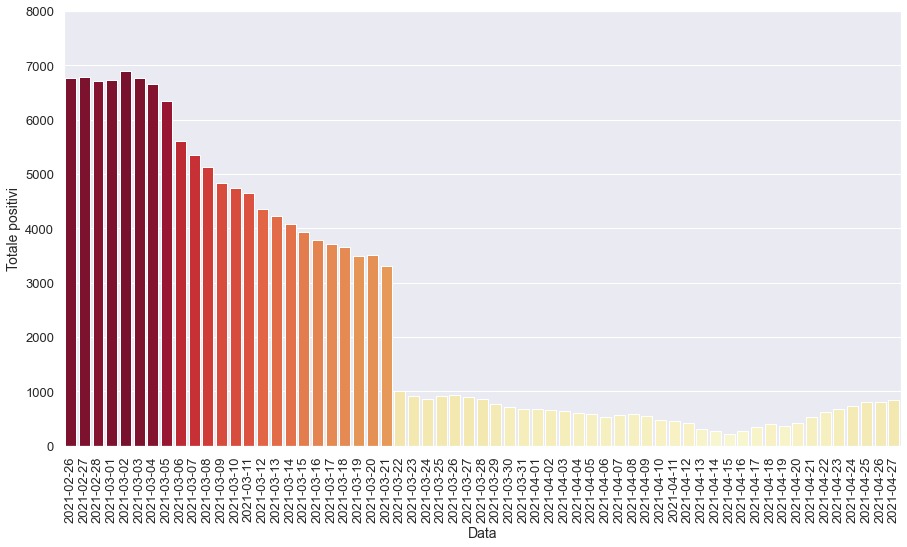

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

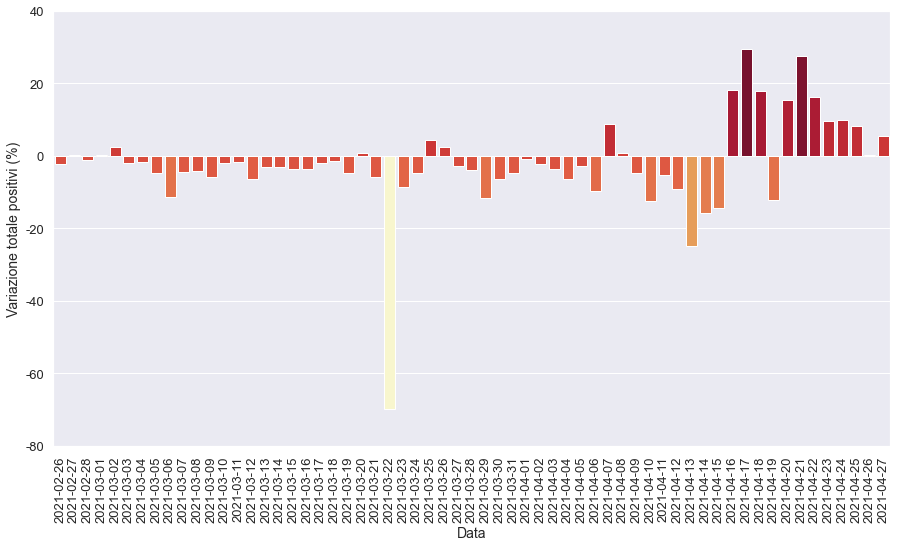

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

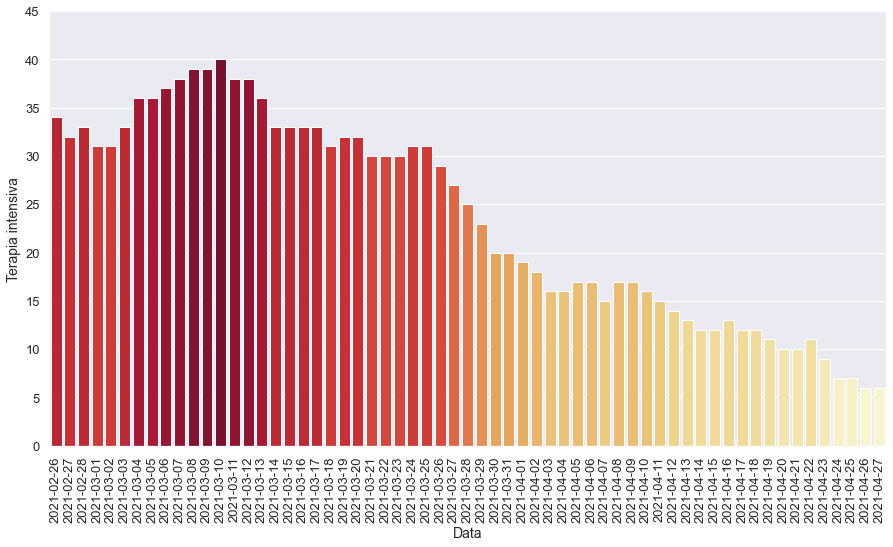

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

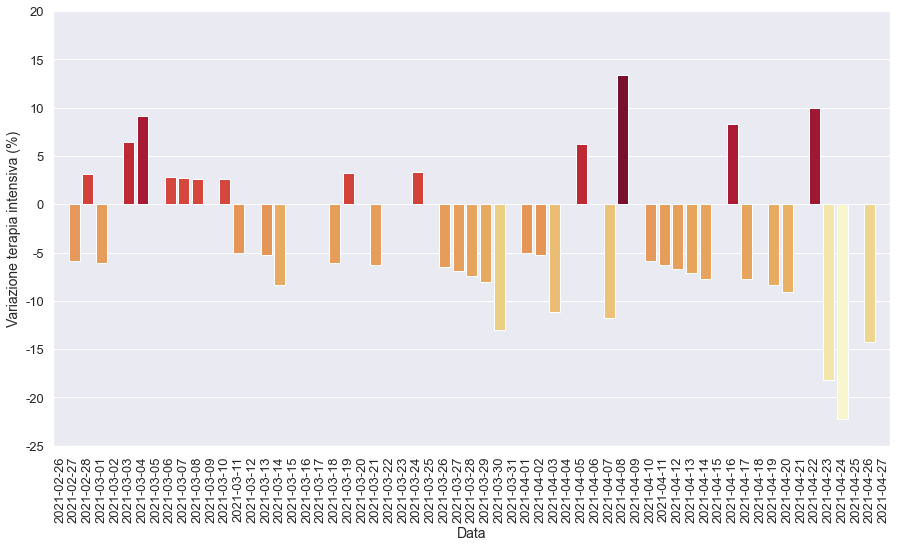

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

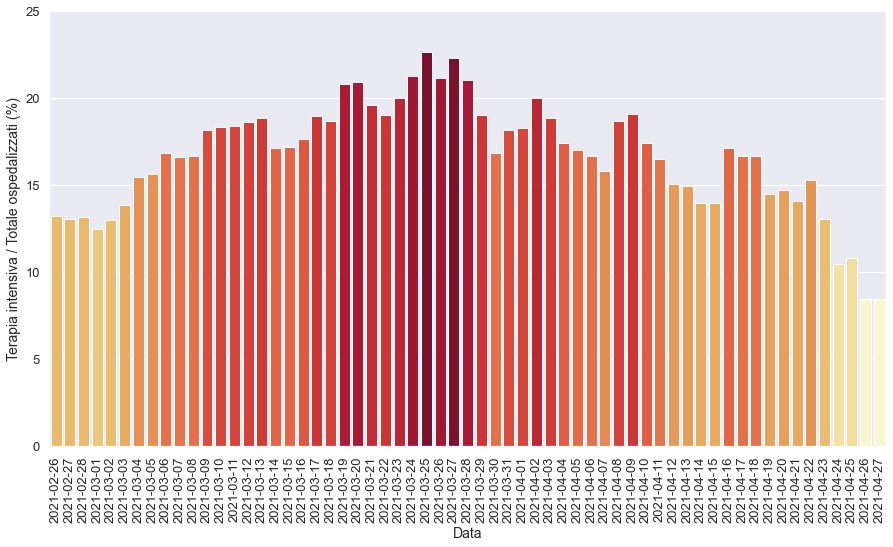

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

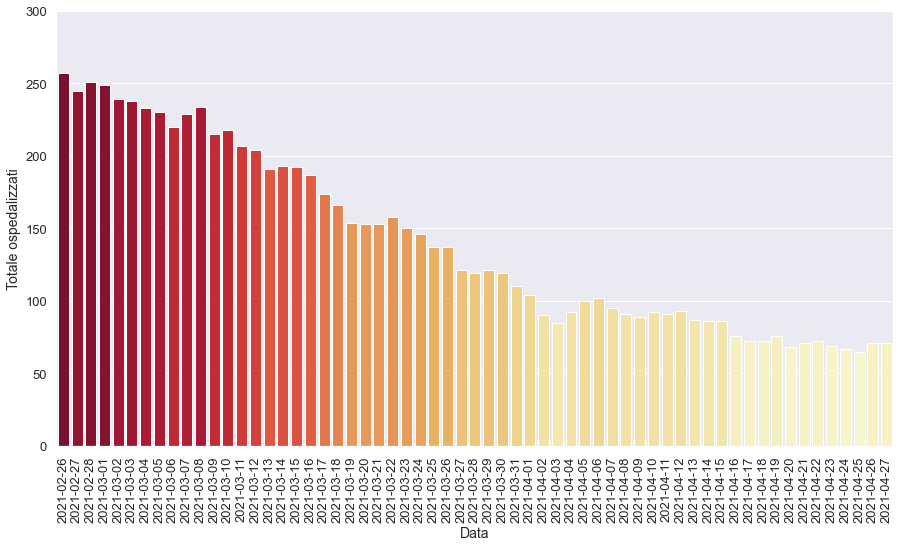

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

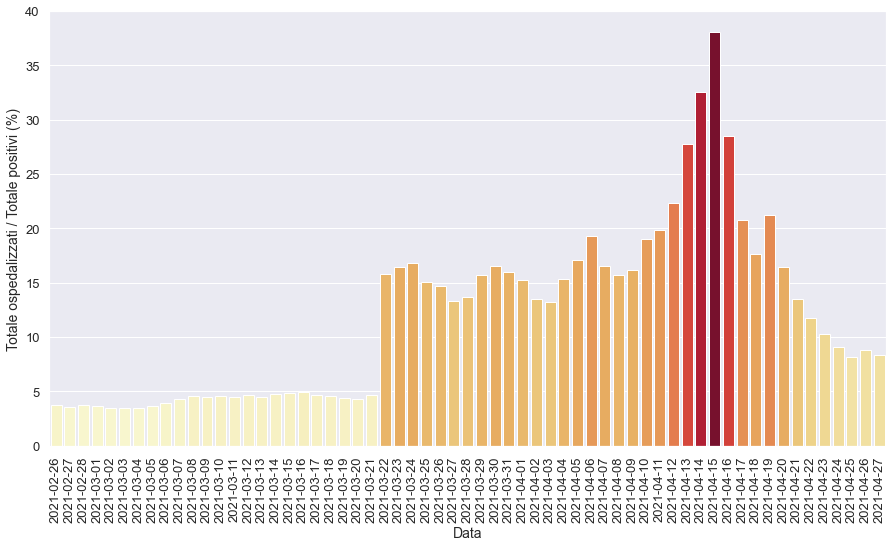

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

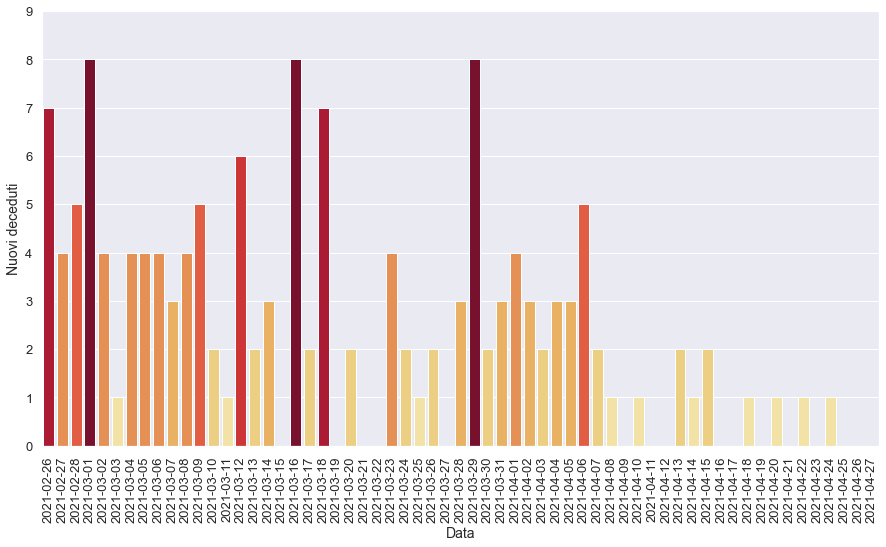

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

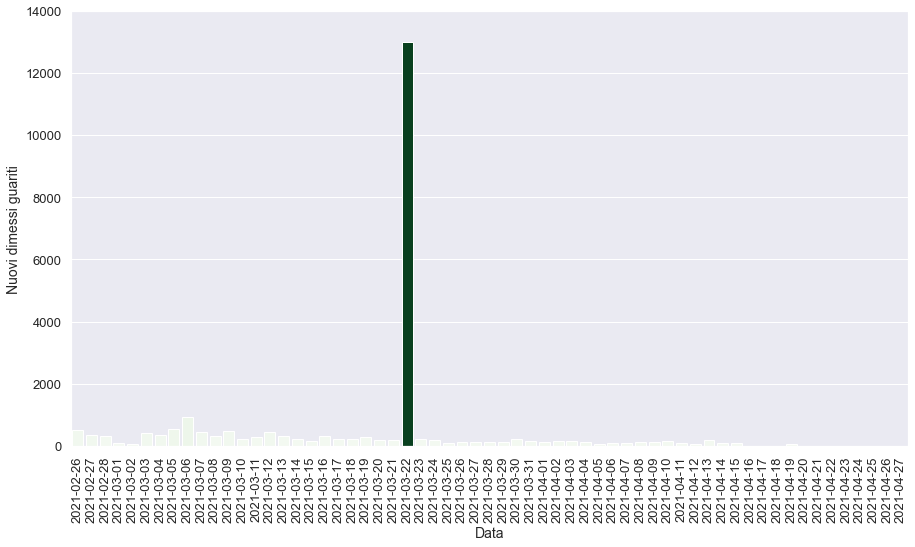

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,21,P.A. Bolzano,94,25,119,751,870,-36,79,...,3.0,6069.0,1040.0,-34.0,21.01,13.68,1.30,7.60,-7.41,-3.97
1,2021-03-29T17:00:00,21,P.A. Bolzano,98,23,121,648,769,-101,35,...,8.0,3920.0,253.0,-103.0,19.01,15.73,0.89,13.83,-8.00,-11.61
2,2021-03-30T17:00:00,21,P.A. Bolzano,99,20,119,600,719,-50,180,...,2.0,16724.0,1904.0,-48.0,16.81,16.55,1.08,9.45,-13.04,-6.50
3,2021-03-31T17:00:00,21,P.A. Bolzano,90,20,110,576,686,-33,120,...,3.0,13418.0,1473.0,-24.0,18.18,16.03,0.89,8.15,0.00,-4.59
4,2021-04-01T17:00:00,21,P.A. Bolzano,85,19,104,577,681,-5,117,...,4.0,13479.0,1547.0,1.0,18.27,15.27,0.87,7.56,-5.00,-0.73
5,2021-04-02T17:00:00,21,P.A. Bolzano,72,18,90,575,665,-16,134,...,3.0,11395.0,1471.0,-2.0,20.00,13.53,1.18,9.11,-5.26,-2.35
6,2021-04-03T17:00:00,21,P.A. Bolzano,69,16,85,556,641,-24,145,...,2.0,9452.0,1282.0,-19.0,18.82,13.26,1.53,11.31,-11.11,-3.61
7,2021-04-04T17:00:00,21,P.A. Bolzano,76,16,92,508,600,-41,81,...,3.0,4206.0,796.0,-48.0,17.39,15.33,1.93,10.18,0.00,-6.40
8,2021-04-05T17:00:00,21,P.A. Bolzano,83,17,100,484,584,-16,48,...,3.0,1193.0,327.0,-24.0,17.00,17.12,4.02,14.68,6.25,-2.67
9,2021-04-06T17:00:00,21,P.A. Bolzano,85,17,102,426,528,-56,35,...,5.0,2535.0,492.0,-58.0,16.67,19.32,1.38,7.11,0.00,-9.59


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

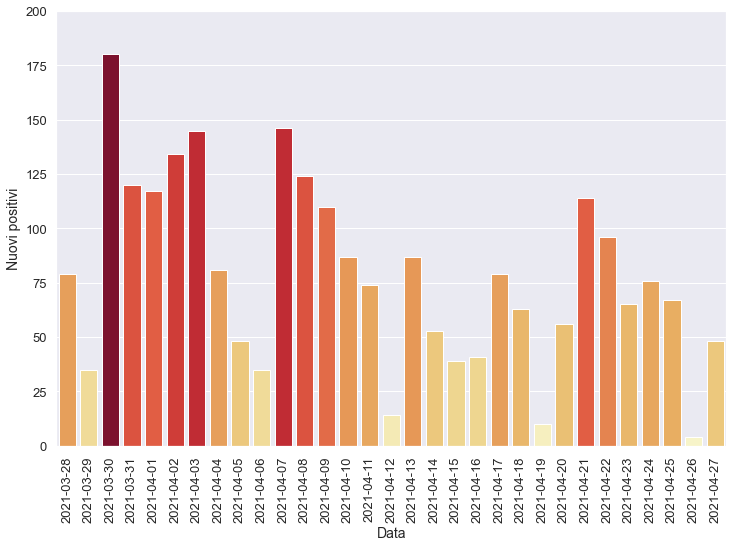

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

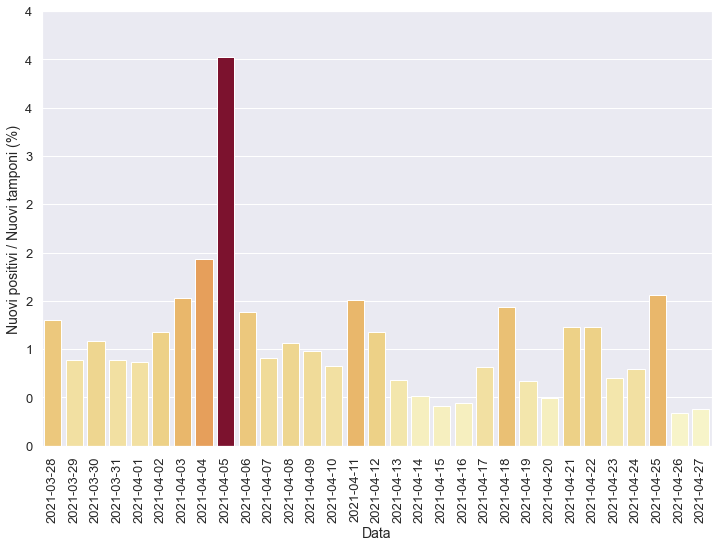

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

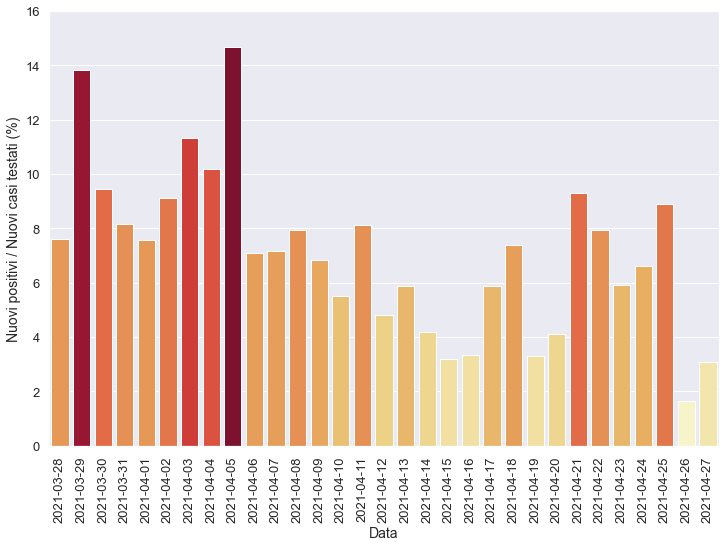

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

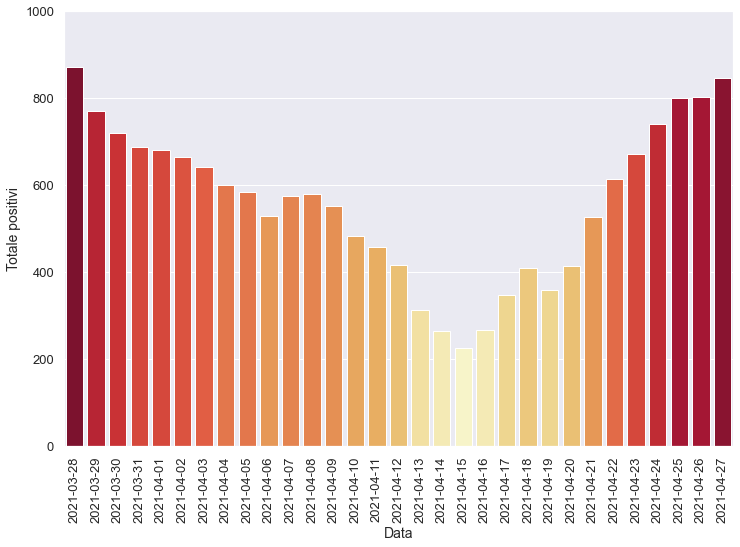

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

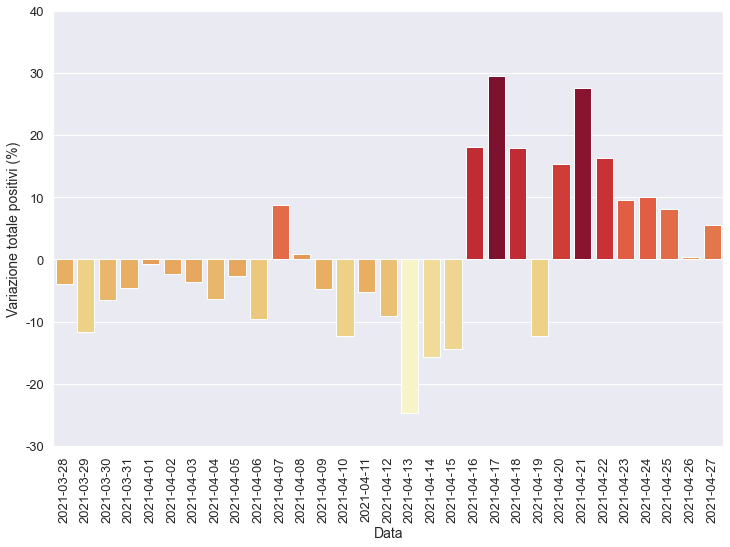

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

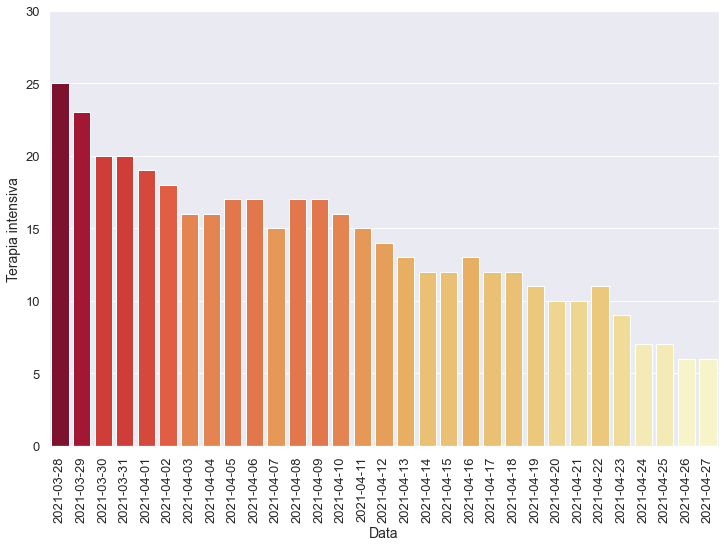

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

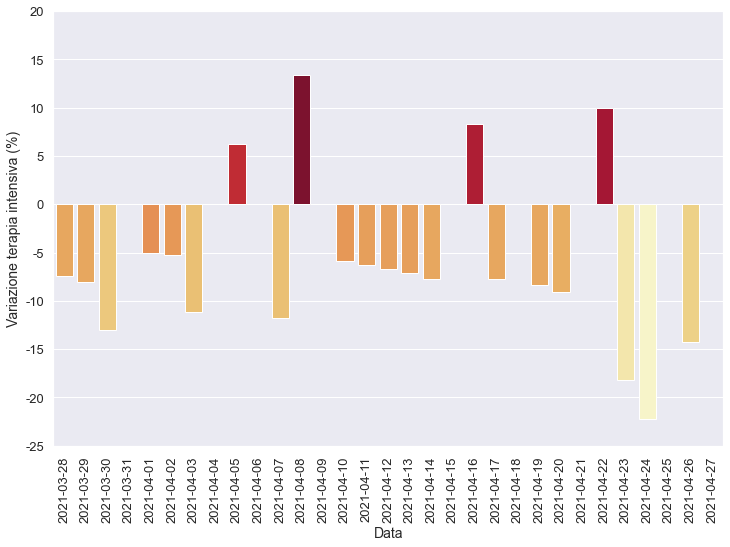

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

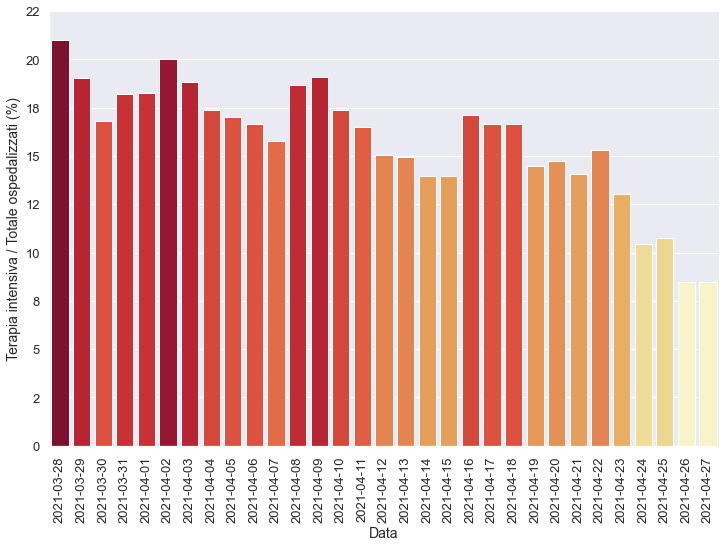

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

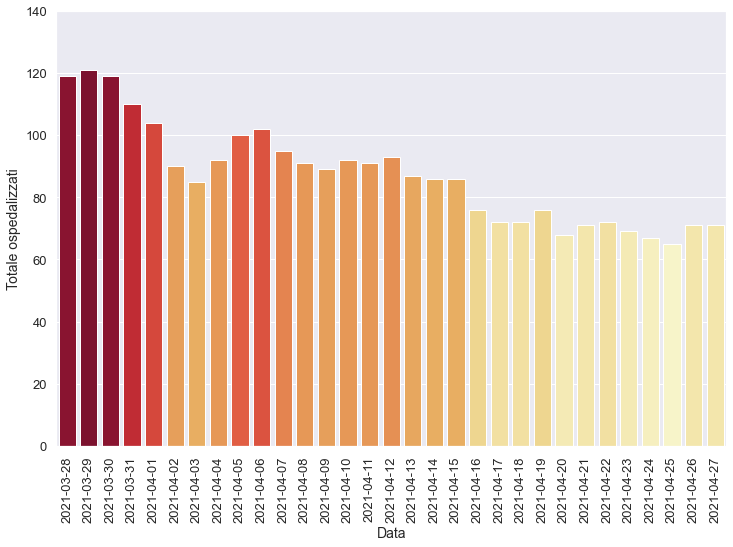

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

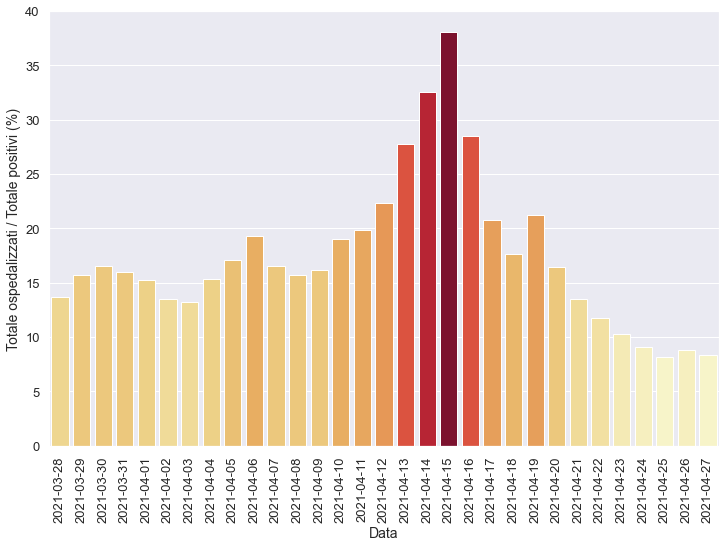

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

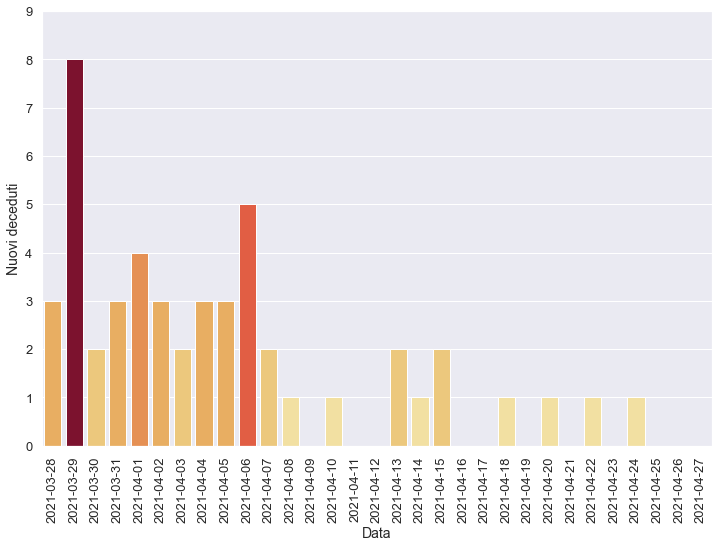

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

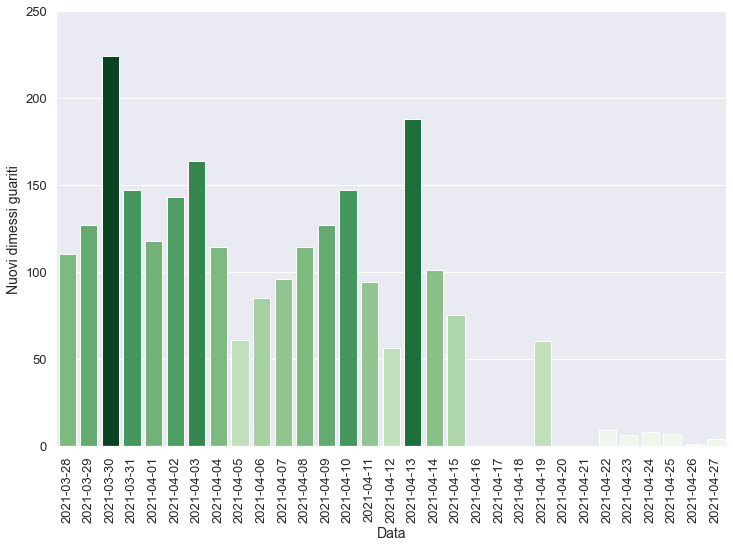

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,21,P.A. Bolzano,58,10,68,345,413,55,56,...,1.0,11502.0,1363.0,63.0,14.71,16.46,0.49,4.11,-9.09,15.36
1,2021-04-21T17:00:00,21,P.A. Bolzano,61,10,71,456,527,114,114,...,0.0,9268.0,1226.0,111.0,14.08,13.47,1.23,9.30,0.00,27.60
2,2021-04-22T17:00:00,21,P.A. Bolzano,61,11,72,541,613,86,96,...,1.0,7791.0,1208.0,85.0,15.28,11.75,1.23,7.95,10.00,16.32
3,2021-04-23T17:00:00,21,P.A. Bolzano,60,9,69,603,672,59,65,...,0.0,9222.0,1098.0,62.0,13.04,10.27,0.70,5.92,-18.18,9.62
4,2021-04-24T17:00:00,21,P.A. Bolzano,60,7,67,672,739,67,76,...,1.0,9681.0,1149.0,69.0,10.45,9.07,0.79,6.61,-22.22,9.97
5,2021-04-25T17:00:00,21,P.A. Bolzano,58,7,65,734,799,60,67,...,0.0,4287.0,752.0,62.0,10.77,8.14,1.56,8.91,0.00,8.12
6,2021-04-26T17:00:00,21,P.A. Bolzano,65,6,71,731,802,3,4,...,0.0,1180.0,246.0,-3.0,8.45,8.85,0.34,1.63,-14.29,0.38
7,2021-04-27T17:00:00,21,P.A. Bolzano,65,6,71,775,846,44,48,...,0.0,12494.0,1565.0,44.0,8.45,8.39,0.38,3.07,0.00,5.49


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

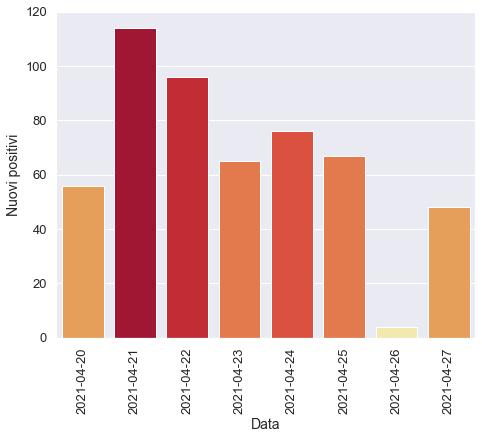

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

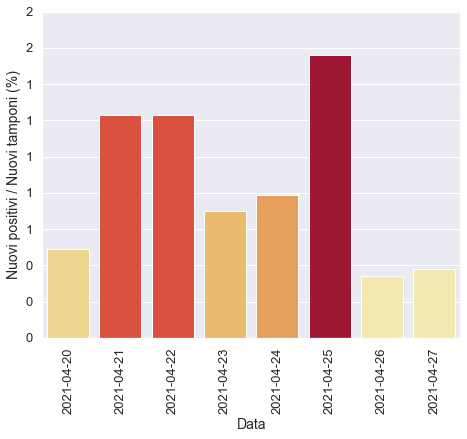

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

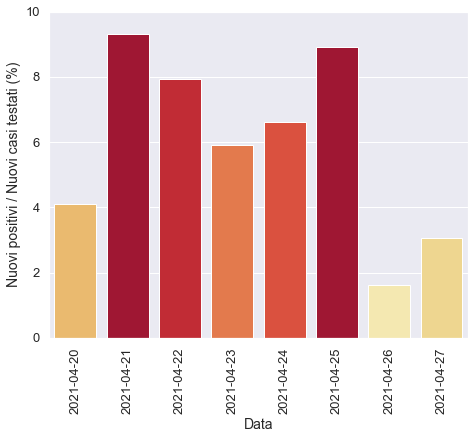

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

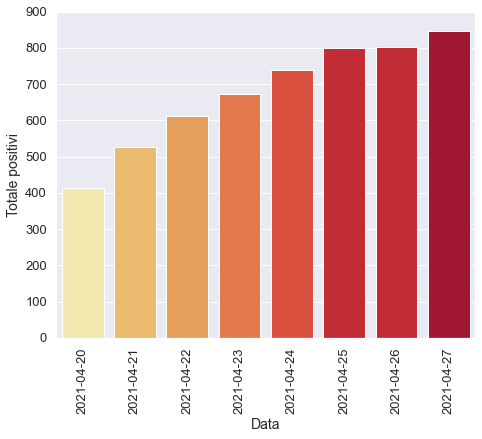

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

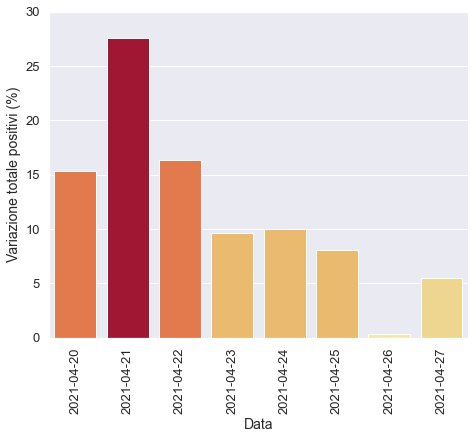

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

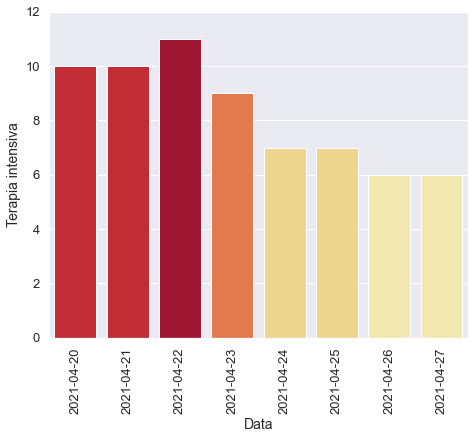

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

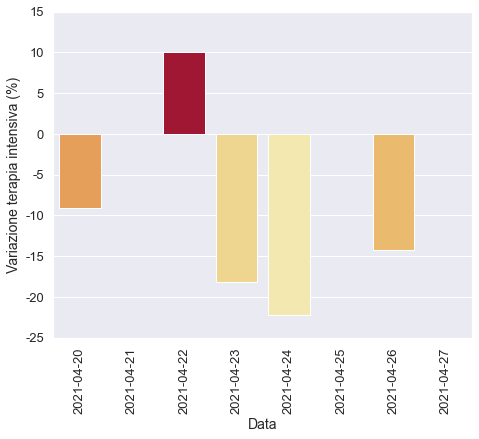

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

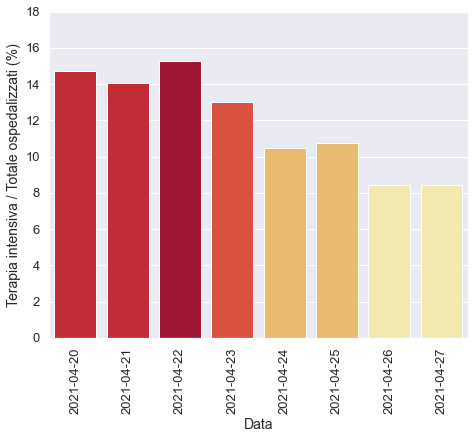

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

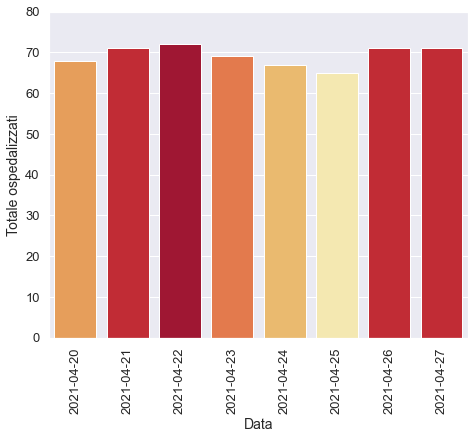

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

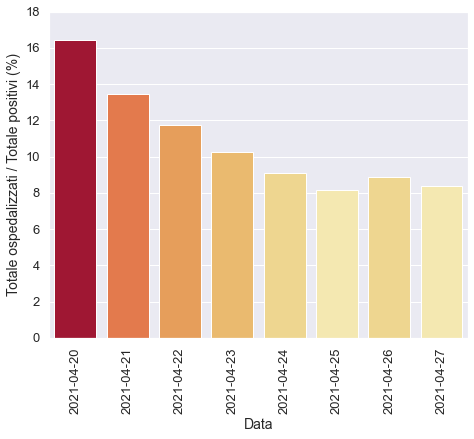

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

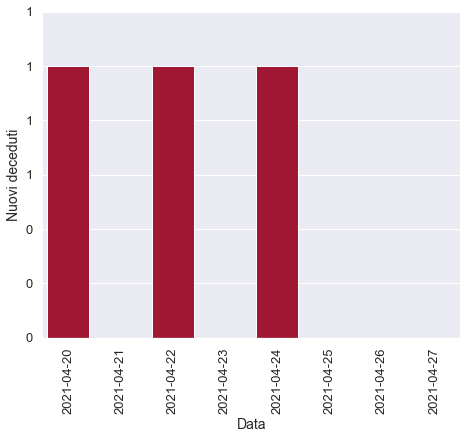

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

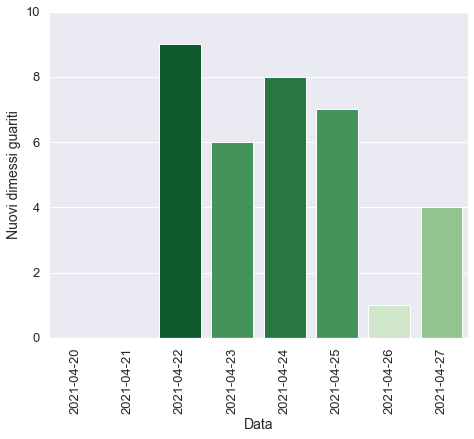

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)